# Implementing a simple MLP using tutorial

## Mini-project group 17: Andreas Holmström and Ivan Sedelkin
## Date: 2023-12-20

This project is about implementing a simple Multilayer Perceptron. 
Here we try to train a network with different parameters. We have decided to experiment with different amount of hidden layers and different amount of hidden layer sizes. 
To make it easier to try different sizes, we decided to have the size of the next hidden layer to be half of the previous one for simplicity. This may affect performance. 

In [1]:
# Imports
import torch
import torch.nn as nn
from keras.datasets import mnist
from tqdm import tqdm

In [2]:
# Inspiration:
# https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/
# https://www.kaggle.com/code/riteshsinha/neural-networks-with-pytorch-mnist

class SimpleMLP:
    def __init__(self, training_data, training_labels, testing_data, testing_labels):
        self.training_data = training_data
        self.training_labels = training_labels
        self.testing_data = testing_data
        self.testing_labels = testing_labels
        self.accuracy = 0

    def create_model(self, model, number_of_layers, maximum_size_of_hidden_layer, input_size, output_size):
        self.model = model
        self.model.add_module("Input layer",nn.Linear(input_size, maximum_size_of_hidden_layer))
        self.model.add_module("Input layer activation", nn.ReLU())
        size = maximum_size_of_hidden_layer
        for layer in range(0, number_of_layers):
            self.model.add_module("Hidden layer number: " + str((layer + 1)), nn.Linear(size, size//2))
            self.model.add_module("Hidden layer activation number: " + str((layer + 1)), nn.ReLU())
            size = size//2
        self.model.add_module("Output layer", nn.Linear(size, output_size))

    def train_model(self, loss_function, optimizer):
        self.model.train(mode=True)
        loss_fn = loss_function
        optimizer = optimizer

        for data, label in tqdm(zip(self.training_data, self.training_labels)):
            y_pred = self.model(data)
            loss = loss_fn(y_pred, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        self.model.train(mode=False)
    
    def test_model(self):
        right_answers = 0
        number_of_iterations = 0
        for data, label in tqdm(zip(self.testing_data, self.testing_labels)):
            y_pred = self.model(data)
            _, predicted = torch.max(y_pred.data, 0)
            if predicted.item() == label.item():
                right_answers += 1
            number_of_iterations += 1
        
        # Accuracy
        accuracy = right_answers / number_of_iterations
        self.accuracy = accuracy
        



In [3]:
# Initialize training data and test data from MNIST

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_flattened = torch.tensor(x_train.reshape(60000, -1),dtype=torch.float32) # (60000, 784)
y_train = torch.tensor(y_train) # (60000,)
x_test_flattened = torch.tensor(x_test.reshape(10000, -1),dtype=torch.float32) # (10000, 784)
y_test = torch.tensor(y_test) # (10000,)

input_size = x_train_flattened.shape[1]
output_size = 10
number_of_hidden_layers = 1
maximum_size_of_hidden_layer = 100

training_data = x_train_flattened
training_labels = y_train
testing_data = x_test_flattened
testing_labels = y_test

hidden_layer_sizes = [100, 200, 400]
hidden_layers = [1,2,4]


In [4]:
# ------------------------- Cross Entropy Loss ------------------------- #

cost_function = nn.CrossEntropyLoss()
print("Cross Entropy loss function using SGD as optimizer\n")
# Adam was really slow.

# Changing the amount of hidden layers and its maximum size
for hidden_layer_size in hidden_layer_sizes:
    for layers in hidden_layers:
        mlp = SimpleMLP(training_data=training_data, training_labels=training_labels, testing_data=testing_data, testing_labels=testing_labels)
        mlp.create_model(nn.Sequential(), layers, hidden_layer_size, input_size, output_size)
        mlp.train_model(cost_function, torch.optim.SGD(mlp.model.parameters(), lr=0.001))
        mlp.test_model()
        print(f"Accuracy for {str(layers)} hidden layers with {str(hidden_layer_size)} hidden layer maximum size was: \t{mlp.accuracy*100:.2f}%")
        print()

# ---------------------------------------------------------------------- #

Cross Entropy loss function using SGD as optimizer



60000it [00:38, 1564.56it/s]
10000it [00:01, 6530.85it/s]


Accuracy for 1 hidden layers with 100 hidden layer maximum size was: 	90.23%



60000it [00:44, 1345.34it/s]
10000it [00:01, 5004.51it/s]


Accuracy for 2 hidden layers with 100 hidden layer maximum size was: 	94.18%



60000it [00:59, 1015.57it/s]
10000it [00:02, 3539.77it/s]


Accuracy for 4 hidden layers with 100 hidden layer maximum size was: 	92.42%



60000it [00:44, 1349.84it/s]
10000it [00:01, 5726.16it/s]


Accuracy for 1 hidden layers with 200 hidden layer maximum size was: 	89.56%



60000it [01:23, 715.10it/s]
10000it [00:03, 3196.00it/s]


Accuracy for 2 hidden layers with 200 hidden layer maximum size was: 	94.39%



60000it [01:39, 603.17it/s]
10000it [00:04, 2170.37it/s]


Accuracy for 4 hidden layers with 200 hidden layer maximum size was: 	93.84%



60000it [02:00, 498.76it/s]
10000it [00:02, 3399.38it/s]


Accuracy for 1 hidden layers with 400 hidden layer maximum size was: 	88.26%



60000it [02:04, 480.79it/s]
10000it [00:02, 3728.84it/s]


Accuracy for 2 hidden layers with 400 hidden layer maximum size was: 	95.11%



60000it [02:09, 463.15it/s]
10000it [00:03, 2678.46it/s]

Accuracy for 4 hidden layers with 400 hidden layer maximum size was: 	95.79%



In [7]:
# ------------------------- Mean Square Error -------------------------- #
training_labels = training_labels.float()
testing_labels = testing_labels.float()
cost_function = nn.MSELoss()
print("Mean Square Error loss function\n")
# Had problems with SGD getting infinite gradients resulting in tensors of nan values and accuracies of 5-10%

# Changing the amount of hidden layers and its maximum size
for hidden_layer_size in hidden_layer_sizes:
    for layers in hidden_layers:
        mlp = SimpleMLP(training_data=training_data, training_labels=training_labels, testing_data=testing_data, testing_labels=testing_labels)
        mlp.create_model(nn.Sequential(), layers, hidden_layer_size, input_size, output_size)
        mlp.train_model(cost_function, torch.optim.Adam(mlp.model.parameters(), lr=0.001))
        mlp.test_model()
        print(f"Accuracy for {str(layers)} hidden layers with {str(hidden_layer_size)} hidden layer maximum size was: \t{mlp.accuracy*100:.2f}%")
        print()

# ---------------------------------------------------------------------- #

Mean Square Error loss function



60000it [03:04, 325.24it/s]
10000it [00:01, 5129.26it/s]


Accuracy for 1 hidden layers with 100 hidden layer maximum size was: 	12.40%



60000it [03:46, 265.34it/s]
10000it [00:03, 2926.51it/s]


Accuracy for 2 hidden layers with 100 hidden layer maximum size was: 	6.65%



60000it [05:47, 172.87it/s]
10000it [00:24, 404.84it/s]


Accuracy for 4 hidden layers with 100 hidden layer maximum size was: 	2.79%



60000it [09:27, 105.82it/s]
10000it [00:03, 3205.44it/s]


Accuracy for 1 hidden layers with 200 hidden layer maximum size was: 	0.57%



60000it [08:08, 122.90it/s]
10000it [00:04, 2314.19it/s]


Accuracy for 2 hidden layers with 200 hidden layer maximum size was: 	0.44%



60000it [09:23, 106.42it/s]
10000it [00:06, 1515.58it/s]


Accuracy for 4 hidden layers with 200 hidden layer maximum size was: 	1.05%



60000it [10:56, 91.36it/s] 
10000it [00:03, 2864.10it/s]


Accuracy for 1 hidden layers with 400 hidden layer maximum size was: 	11.49%



60000it [11:26, 87.35it/s] 
10000it [00:03, 3276.46it/s]


Accuracy for 2 hidden layers with 400 hidden layer maximum size was: 	11.16%



60000it [14:15, 70.14it/s]
10000it [00:06, 1513.87it/s]

Accuracy for 4 hidden layers with 400 hidden layer maximum size was: 	13.89%



In [34]:
# ----------- BEST ONE FROM CROSS ENTROPY ----------- #
training_labels = training_labels.long()

mlp = SimpleMLP(training_data=training_data, training_labels=training_labels, testing_data=testing_data, testing_labels=testing_labels)
mlp.create_model(nn.Sequential(), number_of_layers=4, maximum_size_of_hidden_layer=400, input_size=784, output_size=10)
mlp.train_model(nn.CrossEntropyLoss(), torch.optim.SGD(mlp.model.parameters(), lr=0.001))

60000it [05:03, 197.41it/s]


Random sample selected: 1.0
Prediction: tensor(1)


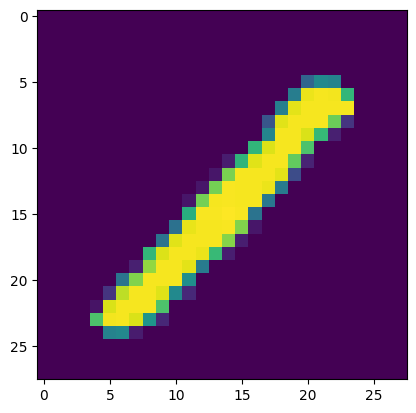

In [93]:
# --------------- DEMO --------------- #

import numpy as np
import matplotlib.pyplot as plt
rand_index = np.random.randint(0, testing_data.shape[0])
random_sample_data = testing_data[rand_index]
random_sample_label = testing_labels[rand_index]

print("Random sample selected: " + str(random_sample_label.item()))

plt.imshow(random_sample_data.reshape(28,28))

prediction = mlp.model(random_sample_data)
_, prediction = torch.max(prediction, 0)
print("Prediction: " + str(prediction))




## Conclusions

Training our model with the Entropy Loss function yielded really good results. 
From what we've read, this is the standard for multilabel classification. 
The issue seems to be trying other loss functions. 
We have tried both L1Loss, HingeEmbedding, however after more research Hinge seemed to be used for binary classification.

From what we now MSE lossfunction is for regression problems, but looking at some different tutorials they seem to use MSE but didn't work for us. 
Therefore it is probably an implementation problem from our side. In this project we have tried different amount of hidden layers and hidden layer sizes. 
We did not implement each model by themselves, instead tried to do a more flexible testing class for trying different amount of hidden layers and hidden layer sizes, perhaps this is the reason for our MSE loss function not performing as it should.

